# Linear Regression for Freight Data

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
freight_df = pd.read_csv("freight_data_clean.csv")

In [8]:
freight_df = freight_df.drop('Unnamed: 0', 1)
freight_df.head()

,Pieces,Weight,Commodity Class,Base Retail,distance(mi)
0,1,2000,60.0,176.21,198.726256
1,1,447,60.0,155.11,851.967779
2,1,331,60.0,130.80,56.302059
3,1,331,60.0,130.80,56.302059
4,1,1236,60.0,145.00,10.439673


In [9]:
freight_df.describe()

,Pieces,Weight,Commodity Class,Base Retail,distance(mi)
count,555.000000,555.000000,555.000000,555.000000,555.000000
mean,2.682883,3132.225225,66.702703,355.565514,970.832289
std,2.395162,3556.943191,15.102893,304.895709,374.566230
min,1.000000,100.000000,60.000000,68.490000,3.985097
25%,1.000000,478.500000,60.000000,141.970000,809.161670
50%,2.000000,1810.000000,65.000000,227.320000,973.389582
75%,4.000000,4799.500000,65.000000,481.785000,1237.722491
max,18.000000,22280.000000,250.000000,2210.270000,2446.769902


In [10]:
freight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 5 columns):
Pieces             555 non-null int64
Weight             555 non-null int64
Commodity Class    555 non-null float64
Base Retail        555 non-null float64
distance(mi)       555 non-null float64
dtypes: float64(3), int64(2)
memory usage: 21.8 KB


## Exploratory Data Analysis

In [11]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

**View the relationships across the data set**

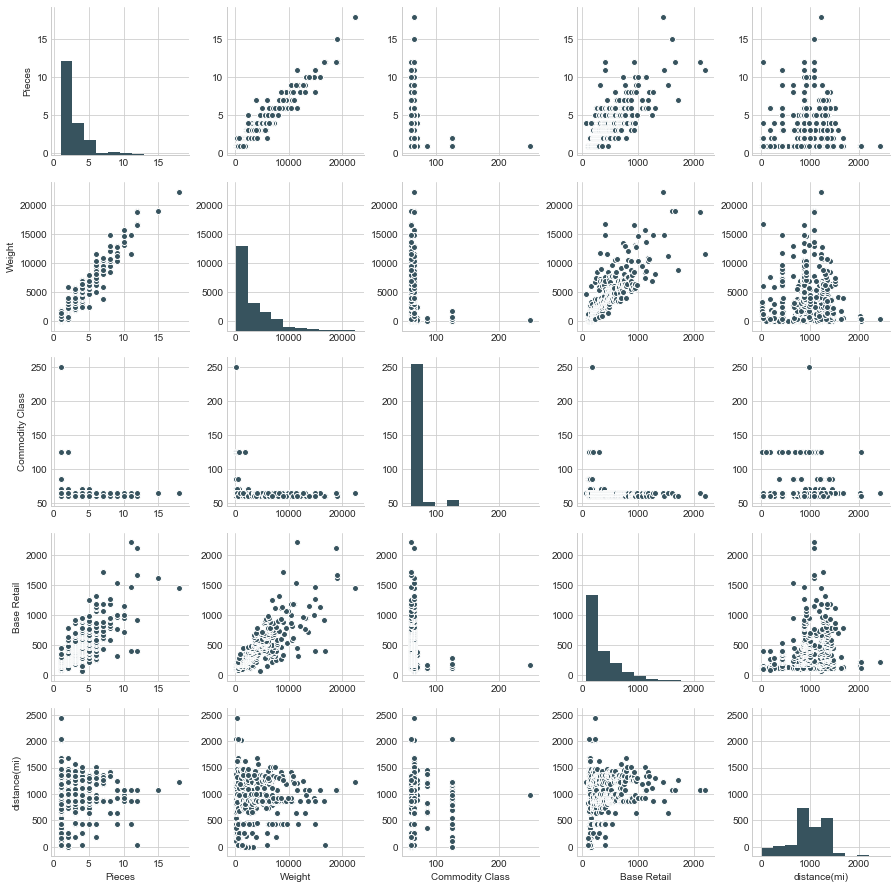

In [12]:
sns.pairplot(freight_df)

**Based off this plot what looks to be the most correlated feature with 'Base Retail'?**

In [13]:
# Pieces and Weight

**Create a linear model plot (using seaborn's lmplot) of  Base Retail vs. Piece AND Base Retail vs. Weight . **

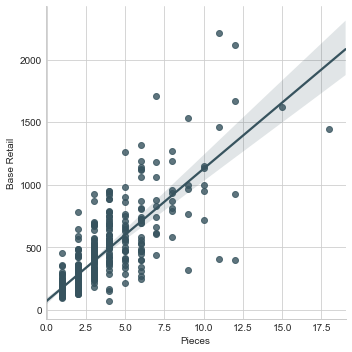

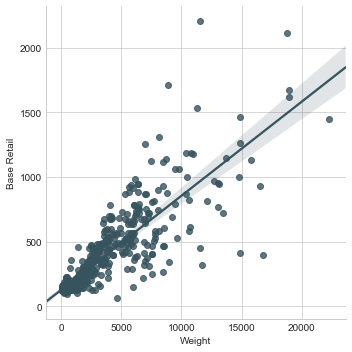

In [14]:
sns.lmplot(x='Pieces',y='Base Retail',data=freight_df)

sns.lmplot(x='Weight',y='Base Retail',data=freight_df)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.

In [16]:
y = freight_df['Base Retail']

In [17]:
# Print out column names
freight_df.columns

Index(['Pieces', 'Weight', 'Commodity Class', 'Base Retail', 'distance(mi)'], dtype='object')

In [18]:
X = freight_df[['Pieces', 'Weight', 'Commodity Class', 'distance(mi)']]

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [19]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [77]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [78]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [79]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Print out the coefficients of the model**

In [80]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 14.94406192   0.06349493  -0.02316884   0.17951679]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [81]:
predictions = lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

Text(0,0.5,'Predicted Y')

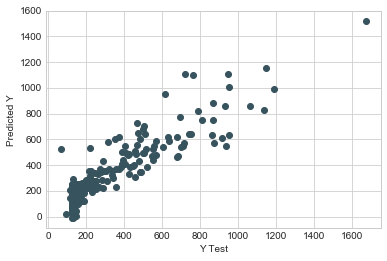

In [82]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [86]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:', metrics.explained_variance_score(y_test, predictions))

MAE: 79.4319130327
MSE: 12686.2899159
RMSE: 112.633431609
R^2: 0.814693257133


## Residuals

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

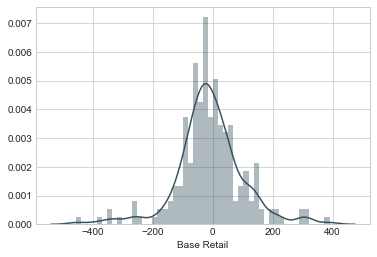

In [87]:
sns.distplot((y_test-predictions),bins=50);

## Conclusion
** Recreate a dataframe with the coefficients. **

In [88]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Pieces,14.944062
Weight,0.063495
Commodity Class,-0.023169
distance(mi),0.179517
